<a href="https://colab.research.google.com/github/addicted-ai/bank-marketing-classification/blob/main/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import pandas as pd
import numpy as np

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
url='https://raw.githubusercontent.com/addicted-ai/bank-marketing-classification/main/train.csv'
df = pd.read_csv(url,delimiter=';')

In [214]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [215]:
df.shape

(45211, 17)

In [216]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [218]:
df.rename(columns={'y':'output'}, inplace=True)

We can see that all 16 columns have `45211` non-null values that's also total row no. So there is no need to check null values or imputation.

## Data Analysis

### Checking Object Columns

In [219]:
obj_cols = list(df.dtypes[df.dtypes==np.object].keys())

In [220]:
for i in obj_cols:
    print('----------', i, '----------\n', df[i].value_counts(),'\n-----------------------------', sep='')

----------job----------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
-----------------------------
----------marital----------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
-----------------------------
----------education----------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
-----------------------------
----------default----------
no     44396
yes      815
Name: default, dtype: int64
-----------------------------
----------housing----------
yes    25130
no     20081
Name: housing, dtype: int64
-----------------------------
----------loan----------
no     37967
yes     7244
Name: loan, dtype: int64
-----------------------------
----------contact-----

- We can see the column `output` i.e our output column as 2 levels yes & no.
- `loan`, `housing` & `default` column has also 2 values yes & no.
- `job` column has `288` unknown value. `education` column has `1857` unknow value. These can be imputed.
- `poutcome` has `36959` unknown value, that's fairly large no. 

In [221]:
df=df.drop(['contact','day','month','poutcome'],axis=1)

## Creating Dummy Variables:

In [222]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'output']

In [223]:
#variable to map

var =  ['default','housing','loan','output']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function 
df[var] = df[var].apply(binary_map)


In [224]:
df[var]

,default,housing,loan,output
0,0,1,0,0
1,0,1,0,0
2,0,1,1,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
45206,0,0,0,1
45207,0,0,0,1
45208,0,0,0,1
45209,0,0,0,0


In [225]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['job', 'marital', 'education']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)

In [226]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,output,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


- We can no drop those categorical columns since we already have created dummy variables for them.

In [227]:
df.drop(['job', 'marital', 'education'], axis=1, inplace=True)
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,output,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [228]:
X = df.drop(['output'], axis=1)
y = df['output']

In [229]:
from sklearn.model_selection import train_test_split

# Specifying seed, so we always get same rows for train and test dataset respectively
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100, stratify=y)

In [230]:
y_train.value_counts(normalize=True)

0    0.883022
1    0.116978
Name: output, dtype: float64

In [231]:
y_test.value_counts(normalize=True)

0    0.882999
1    0.117001
Name: output, dtype: float64

In [232]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns.values
for i in num_cols:
    print('----------', i, '----------\n', df[i].value_counts(),'\n-----------------------------', sep='')

----------age----------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
-----------------------------
----------default----------
0    44396
1      815
Name: default, dtype: int64
-----------------------------
----------balance----------
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
-----------------------------
----------housing----------
1    25130
0    20081
Name: housing, dtype: int64
-----------------------------
----------loan----------
0    37967
1     7244
Name: loan, dtype: int64
-----------------------------
----------duration----------
124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64
-------------

In [233]:
num_cols = list(num_cols)
num_cols.remove('loan')
num_cols.remove('housing')
num_cols.remove('default')

In [234]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,default,balance,housing,loan,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
44481,1.047863,0,-0.446361,0,0,-0.441644,0.078624,0.536601,1.392249,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
25167,-0.462281,0,-0.446361,1,0,3.265546,-0.243851,-0.410917,-0.238248,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
40209,-1.500505,0,1.603911,0,0,-0.625439,0.078624,-0.410917,-0.238248,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
30954,-0.462281,0,-0.408612,0,0,-0.731023,-0.243851,-0.410917,-0.238248,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
26429,1.047863,0,0.954954,1,1,-0.836608,-0.566326,-0.410917,-0.238248,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22013,1.519784,0,-0.446361,0,0,-0.023216,0.078624,-0.410917,-0.238248,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
39259,1.425400,0,-0.158811,1,0,-0.644991,-0.243851,-0.410917,-0.238248,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8859,-0.934201,0,-0.329831,1,1,-0.770129,1.046050,-0.410917,-0.238248,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
36047,0.009639,0,-0.517592,1,0,0.215327,-0.566326,3.079936,0.984625,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


# Model Building using Stats Model & RFE:

In [235]:
import statsmodels.api as sm

In [236]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [237]:
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True])

In [238]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 4),
 ('default', True, 1),
 ('balance', False, 5),
 ('housing', True, 1),
 ('loan', True, 1),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', True, 1),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', True, 1),
 ('job_management', False, 2),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 3),
 ('job_unknown', True, 1),
 ('marital_married', False, 6),
 ('marital_single', True, 1),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', True, 1)]

In [239]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unknown', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown'],
      dtype='object')

In [240]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial()).fit()
logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31626
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8595.6
Date:                Sat, 03 Jul 2021   Deviance:                       17191.
Time:                        13:17:46   Pearson chi2:                 3.59e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1066      0.080    -26.448      0.000      -2.263      -1.950
default                -0.3451      0.191     -1.811      0.070      -0.719       0.028
housing                -1.0863      0.044    -24.559      0.000      -1.173      -1.000
loan                   -0.6631      0.068     -9.793      0.000      -0.796      -0.530
duration                1.0004      0.018     54.304      0.000       0.964       1.037
campaign               -0.4220      0.037    -11.353      0.000      -0.495      -0.349
pdays                   0.2866      0.020     14.511      0.000       0.248       0.325
previous                0.1907      0.023      8.266      0.000       0.146       0.236
job_blue-collar        -0.4230      0.070     -6.044      0.000      -0.560      -0.286
job_entrepreneur       -0.3944      0.126     -3.124      0.002      -0.642      -0.147
job_housemaid          -0.6732      0.156     -4.327      0.000      -0.978      -0.368
job_retired             0.5586      0.081      6.859      0.000       0.399       0.718
job_self-employed      -0.3097      0.111     -2.780      0.005      -0.528      -0.091
job_services           -0.3013      0.086     -3.512      0.000      -0.470      -0.133
job_student             0.5978      0.108      5.521      0.000       0.386       0.810
job_technician         -0.1439      0.060     -2.379      0.017      -0.263      -0.025
job_unknown            -0.1714      0.245     -0.700      0.484      -0.651       0.308
marital_single          0.2701      0.045      6.006      0.000       0.182       0.358
education_secondary     0.2381      0.072      3.307      0.001       0.097       0.379
education_tertiary      0.4611      0.079      5.820      0.000       0.306       0.616
education_unknown       0.2899      0.114      2.532      0.011       0.066       0.514
=======================================================================================
"""

In [241]:
def print_vif(df, cols):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = cols
    vif['VIF'] = [variance_inflation_factor(df[cols].values, i) for i in range(df[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
print_vif(X_train, cols)

,Features,VIF
17,education_secondary,2.57
1,housing,2.25
18,education_tertiary,1.60
16,marital_single,1.52
7,job_blue-collar,1.51
14,job_technician,1.45
12,job_services,1.31
5,pdays,1.26
6,previous,1.23
2,loan,1.21


In [242]:
#dropping column with high p-value

cols = cols.drop('job_unknown',1)

In [243]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31627
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8595.9
Date:                Sat, 03 Jul 2021   Deviance:                       17192.
Time:                        13:17:48   Pearson chi2:                 3.64e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1128      0.079    -26.692      0.000      -2.268      -1.958
default                -0.3445      0.191     -1.808      0.071      -0.718       0.029
housing                -1.0847      0.044    -24.551      0.000      -1.171      -0.998
loan                   -0.6624      0.068     -9.783      0.000      -0.795      -0.530
duration                1.0005      0.018     54.308      0.000       0.964       1.037
campaign               -0.4223      0.037    -11.366      0.000      -0.495      -0.350
pdays                   0.2867      0.020     14.512      0.000       0.248       0.325
previous                0.1909      0.023      8.273      0.000       0.146       0.236
job_blue-collar        -0.4185      0.070     -6.003      0.000      -0.555      -0.282
job_entrepreneur       -0.3908      0.126     -3.098      0.002      -0.638      -0.144
job_housemaid          -0.6681      0.155     -4.299      0.000      -0.973      -0.364
job_retired             0.5636      0.081      6.946      0.000       0.405       0.723
job_self-employed      -0.3065      0.111     -2.754      0.006      -0.525      -0.088
job_services           -0.2975      0.086     -3.473      0.001      -0.465      -0.130
job_student             0.6034      0.108      5.588      0.000       0.392       0.815
job_technician         -0.1404      0.060     -2.329      0.020      -0.259      -0.022
marital_single          0.2704      0.045      6.013      0.000       0.182       0.359
education_secondary     0.2398      0.072      3.333      0.001       0.099       0.381
education_tertiary      0.4645      0.079      5.876      0.000       0.310       0.619
education_unknown       0.2795      0.114      2.461      0.014       0.057       0.502
=======================================================================================
"""

In [244]:
# checking VIF value
print_vif(X_train, cols)

,Features,VIF
16,education_secondary,2.55
1,housing,2.25
17,education_tertiary,1.60
15,marital_single,1.52
7,job_blue-collar,1.51
14,job_technician,1.45
12,job_services,1.31
5,pdays,1.26
6,previous,1.23
2,loan,1.21


In [245]:
#dropping column with high p-value

cols = cols.drop('default',1)

In [246]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 output   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31628
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8597.7
Date:                Sat, 03 Jul 2021   Deviance:                       17195.
Time:                        13:17:50   Pearson chi2:                 3.85e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.1157      0.079    -26.741      0.000      -2.271      -1.961
housing                -1.0850      0.044    -24.561      0.000      -1.172      -0.998
loan                   -0.6710      0.068     -9.931      0.000      -0.803      -0.539
duration                1.0007      0.018     54.325      0.000       0.965       1.037
campaign               -0.4229      0.037    -11.381      0.000      -0.496      -0.350
pdays                   0.2875      0.020     14.560      0.000       0.249       0.326
previous                0.1914      0.023      8.297      0.000       0.146       0.237
job_blue-collar        -0.4198      0.070     -6.023      0.000      -0.556      -0.283
job_entrepreneur       -0.3989      0.126     -3.163      0.002      -0.646      -0.152
job_housemaid          -0.6685      0.155     -4.304      0.000      -0.973      -0.364
job_retired             0.5651      0.081      6.966      0.000       0.406       0.724
job_self-employed      -0.3087      0.111     -2.775      0.006      -0.527      -0.091
job_services           -0.2959      0.086     -3.455      0.001      -0.464      -0.128
job_student             0.6067      0.108      5.620      0.000       0.395       0.818
job_technician         -0.1409      0.060     -2.336      0.019      -0.259      -0.023
marital_single          0.2693      0.045      5.990      0.000       0.181       0.357
education_secondary     0.2386      0.072      3.318      0.001       0.098       0.380
education_tertiary      0.4651      0.079      5.885      0.000       0.310       0.620
education_unknown       0.2785      0.114      2.452      0.014       0.056       0.501
=======================================================================================
"""

In [247]:
# Printing VIF
print_vif(X_train, cols)

,Features,VIF
15,education_secondary,2.55
0,housing,2.25
16,education_tertiary,1.60
6,job_blue-collar,1.51
14,marital_single,1.51
13,job_technician,1.45
11,job_services,1.31
4,pdays,1.25
5,previous,1.23
1,loan,1.20


`We have achieved our desired model as it is suggested by the 'smaller' or less than'0.05' p values and vif lower than '5'.`

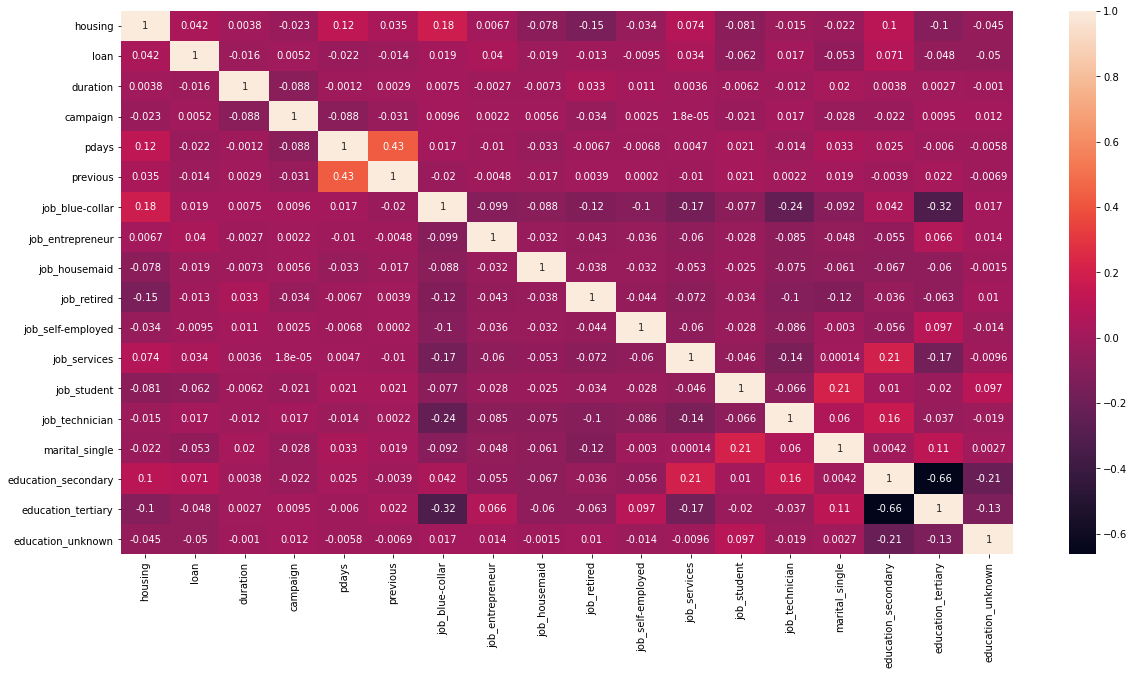

In [248]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train[cols].corr(),annot = True)
plt.show()

In [249]:
# Getting the Predicted values on the train set
y_train_pred = logm3.predict(X_train_sm)
y_train_pred[:10]

44481    0.136347
25167    0.487267
40209    0.099378
30954    0.083180
26429    0.008048
9926     0.075558
5350     0.021337
27903    0.140808
19437    0.017542
21459    0.376723
dtype: float64

In [250]:
# y_train_pred = y_train_pred.values.reshape(-1)
# y_train_pred[:10]

In [251]:
prediction_table = pd.DataFrame()
prediction_table['Actual'] = y_train
prediction_table['Predict_Prob'] = y_train_pred
prediction_table.head()

,Actual,Predict_Prob
44481,0,0.136347
25167,0,0.487267
40209,0,0.099378
30954,0,0.083180
26429,0,0.008048


In [252]:
prediction_table['Predicted'] = prediction_table.Predict_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
prediction_table.head(15)

,Actual,Predict_Prob,Predicted
44481,0,0.136347,0
25167,0,0.487267,0
40209,0,0.099378,0
30954,0,0.083180,0
26429,0,0.008048,0
9926,0,0.075558,0
5350,0,0.021337,0
27903,0,0.140808,0
19437,0,0.017542,0
21459,0,0.376723,0


In [253]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(prediction_table.Actual, prediction_table.Predicted)
print(confusion)

[[27412   533]
 [ 2935   767]]


In [254]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(prediction_table.Actual, prediction_table.Predicted))

0.8904161531898758


In [255]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [256]:
# Let's check the sensitivity of our logistic regression model
TP / float(TP+FN)

0.2071853052404106

`It indicates that 20.71% of true positives or here in our case converted values  are predicted correctly by our model.which is very low . we need to modify the cutoff value .`

In [257]:
# Let us calculate specificity
TN / float(TN+FP)

0.9809268205403471

In [258]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.01907317945965289


In [259]:
# positive predictive value 
print (TP / float(TP+FP))

0.59


In [260]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9032853329818433


In [261]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

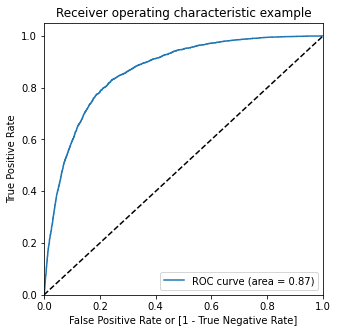

In [262]:
fpr, tpr, thresholds = metrics.roc_curve(prediction_table.Actual, prediction_table.Predict_Prob, drop_intermediate = False )
draw_roc(prediction_table.Actual, prediction_table.Predict_Prob)


In [263]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    prediction_table[i]= prediction_table.Predict_Prob.map(lambda x: 1 if x > i else 0)
prediction_table.head(10)

,Actual,Predict_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
44481,0,0.136347,0,1,1,0,0,0,0,0,0,0,0
25167,0,0.487267,0,1,1,1,1,1,0,0,0,0,0
40209,0,0.099378,0,1,0,0,0,0,0,0,0,0,0
30954,0,0.083180,0,1,0,0,0,0,0,0,0,0,0
26429,0,0.008048,0,1,0,0,0,0,0,0,0,0,0
9926,0,0.075558,0,1,0,0,0,0,0,0,0,0,0
5350,0,0.021337,0,1,0,0,0,0,0,0,0,0,0
27903,0,0.140808,0,1,1,0,0,0,0,0,0,0,0
19437,0,0.017542,0,1,0,0,0,0,0,0,0,0,0
21459,0,0.376723,0,1,1,1,1,0,0,0,0,0,0


In [264]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['cutoff','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(prediction_table.Actual, prediction_table[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     cutoff  accuracy  sensitivity  specificity
0.0     0.0  0.116978     1.000000     0.000000
0.1     0.1  0.752204     0.840086     0.740562
0.2     0.2  0.864853     0.588061     0.901521
0.3     0.3  0.886024     0.410589     0.949007
0.4     0.4  0.888963     0.284441     0.969046
0.5     0.5  0.890416     0.207185     0.980927
0.6     0.6  0.889563     0.151270     0.987368
0.7     0.7  0.887920     0.104268     0.991734
0.8     0.8  0.886245     0.068341     0.994597
0.9     0.9  0.884570     0.035386     0.997066


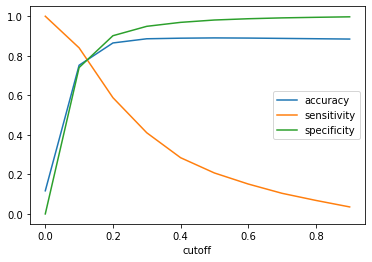

In [265]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='cutoff', y=['accuracy','sensitivity','specificity'])
plt.show()

In [266]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

prediction_table['final_Predicted'] = prediction_table.Predict_Prob.map( lambda x: 1 if x > 0.11 else 0)

prediction_table.head(10)

,Actual,Predict_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
44481,0,0.136347,0,1,1,0,0,0,0,0,0,0,0,1
25167,0,0.487267,0,1,1,1,1,1,0,0,0,0,0,1
40209,0,0.099378,0,1,0,0,0,0,0,0,0,0,0,0
30954,0,0.083180,0,1,0,0,0,0,0,0,0,0,0,0
26429,0,0.008048,0,1,0,0,0,0,0,0,0,0,0,0
9926,0,0.075558,0,1,0,0,0,0,0,0,0,0,0,0
5350,0,0.021337,0,1,0,0,0,0,0,0,0,0,0,0
27903,0,0.140808,0,1,1,0,0,0,0,0,0,0,0,1
19437,0,0.017542,0,1,0,0,0,0,0,0,0,0,0,0
21459,0,0.376723,0,1,1,1,1,0,0,0,0,0,0,1


In [267]:
# Let's check the overall accuracy.
metrics.accuracy_score(prediction_table.Actual, prediction_table.final_Predicted)

0.7752077606092205

In [268]:
confusion2 = metrics.confusion_matrix(prediction_table.Actual, prediction_table.final_Predicted )
confusion2

array([[21513,  6432],
       [  682,  3020]])

In [269]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



In [270]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8157752566180443

In [271]:
# Let us calculate specificity
TN / float(TN+FP)

0.7698336017176597

In [272]:
# Calculate False Postive Rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.2301663982823403


In [273]:
# Positive predictive value 
print (TP / float(TP+FP))

0.31950909860347015


In [274]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9692723586393331
